In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments_sentiment_df = pd.read_csv('comments_with_predictions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'comments_with_predictions.csv'

In [ ]:
comments_sentiment_df

,id,body,date_posted,reddit_id,author_id,post_id,parent_id,prediction,confidence
0,1000,Because not everybody treats every day like it...,2023-01-23,j5l5ofh,91,161,-1,negative,0.351076
1,1001,I mean Im “alternative” and I dress in colors ...,2023-01-23,j5l4ynl,492,161,-1,positive,0.372173
2,1002,Because U-M is a machine for inducing depression,2023-01-23,j5kzjyf,330,161,-1,negative,0.387632
3,1003,"It’s a p all around color, it goes with p much...",2023-01-23,j5kywwh,102,161,-1,negative,0.361442
4,1004,Have you considered that everyone at Umich has...,2023-01-23,j5kyugh,314,161,-1,negative,0.390202
...,...,...,...,...,...,...,...,...,...
13182,17179,not this time of year you can't . unless you j...,2023-02-06,j7hk271,232,2508,17165,negative,0.366654
13183,17180,Grad Library had some very sleep-inducing carr...,2023-02-06,j7ip5h9,3421,2508,17166,positive,0.368972
13184,17181,do I get a talking cat too?,2023-02-06,j7hksin,765,2508,17171,neutral,0.352055
13185,17182,I've seen them little shits under furniture an...,2023-02-10,j7ywlu9,2007,2508,17178,negative,0.368039


In [ ]:
# Convert to datetime
comments_sentiment_df.date_posted = pd.to_datetime(comments_sentiment_df.date_posted)

# Convert to year-week format
comments_sentiment_df['week_posted'] = comments_sentiment_df.date_posted.dt.strftime('%Y-%U')

In [ ]:
# 51st week of 2022 and 10th week of 2023 are incomplete, so ignore them for the purpose of plotting
comments_sentiment_df = comments_sentiment_df[~comments_sentiment_df['week_posted'].isin(['2022-51', '2023-10'])]

comments_sentiment_df[comments_sentiment_df.prediction == 'positive'].sort_values(by='week_posted').head()

,id,body,date_posted,reddit_id,author_id,post_id,parent_id,prediction,confidence,week_posted
2647,5645,Any lube brand recommendations?,2022-12-26,j1spx3d,89,784,5642,positive,0.352099,2022-52
2295,5293,"If it's literally called ""Honor Society"", then...",2022-12-29,j25kqrr,58,746,-1,positive,0.400926,2022-52
2296,5294,I got one for Christmas so count me in,2022-12-29,j26u5oo,394,745,-1,positive,0.399095,2022-52
2297,5295,"I got the same email, they've been emailing me...",2022-12-29,j24uw36,1879,746,-1,positive,0.369472,2022-52
2298,5296,Also shows support for vaccines https://news.y...,2022-12-29,j26bddc,1878,745,-1,positive,0.398482,2022-52


#### Plot 1

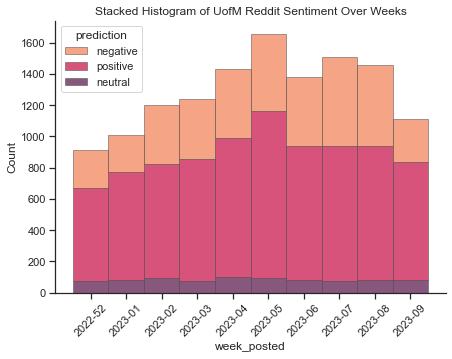

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    comments_sentiment_df.sort_values(by='week_posted'),
    x='week_posted', hue='prediction',
    multiple='stack',
    palette='rocket_r',
    edgecolor='.3',
    linewidth=.5
).set_title('Stacked Histogram of UofM Reddit Sentiment Over Weeks')
plt.xticks(rotation=45);

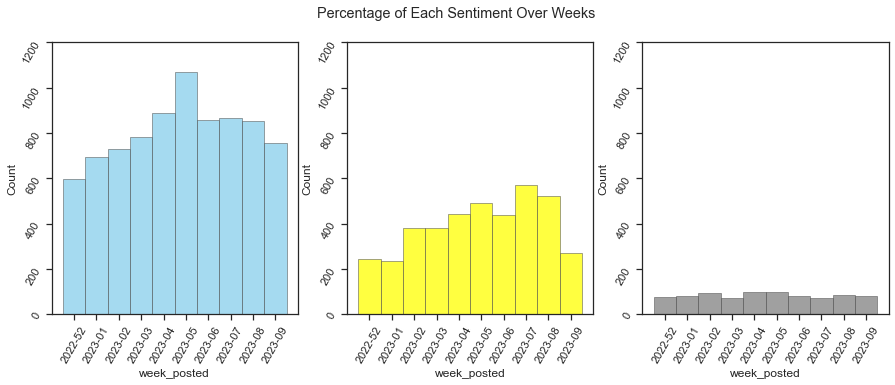

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(
    comments_sentiment_df[comments_sentiment_df.prediction == 'positive'].sort_values(by='week_posted'),
    x='week_posted',
    multiple='stack',
    color='skyblue',
    edgecolor='.3',
    linewidth=.5,
    ax=axes[0]
)

sns.histplot(
    comments_sentiment_df[comments_sentiment_df.prediction == 'negative'].sort_values(by='week_posted'),
    x='week_posted',
    multiple='stack',
    color='yellow',
    edgecolor='.3',
    linewidth=.5,
    ax=axes[1]
)

sns.histplot(
    comments_sentiment_df[comments_sentiment_df.prediction == 'neutral'].sort_values(by='week_posted'),
    x='week_posted',
    multiple='stack',
    color='grey',
    edgecolor='.3',
    linewidth=.5,
    ax=axes[2]
)

for ax in axes:
    ax.set(ylim=(0, 1200))
    ax.tick_params(labelrotation=60)

f.suptitle('Count of Each Sentiment Over Weeks');

In [ ]:
# Aggregate and calculate the percentage of positive, negative, and neutral posts each week
aggcnt_by_week = comments_sentiment_df.groupby('week_posted', as_index=False).prediction.value_counts()
aggcnt_by_week['percentage'] = aggcnt_by_week['count'] / aggcnt_by_week.groupby('week_posted')['count'].transform('sum')
aggcnt_by_week['percentage'] = aggcnt_by_week['percentage'].round(2)
aggcnt_by_week.head(6)

,week_posted,prediction,count,percentage
0,2022-52,positive,596,0.65
1,2022-52,negative,243,0.27
2,2022-52,neutral,75,0.08
3,2023-01,positive,695,0.69
4,2023-01,negative,236,0.23
5,2023-01,neutral,80,0.08


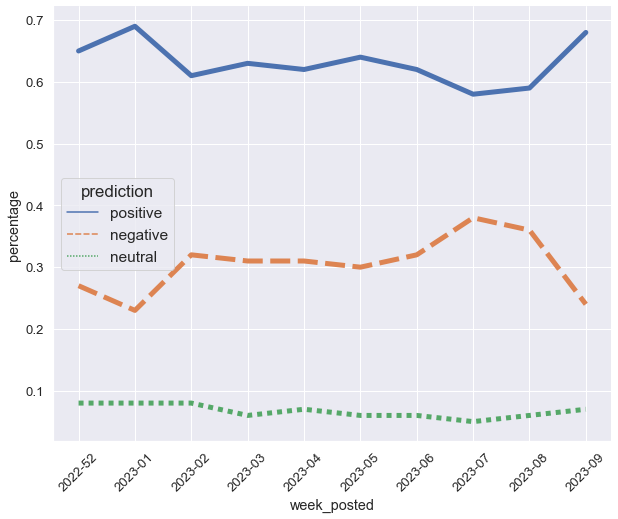

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set_theme(style="darkgrid")
sns.despine(f)
sns.set(font_scale=1.4)
sns.lineplot(
    data=aggcnt_by_week, 
    x='week_posted', 
    y='percentage', 
    linewidth=5,
    hue='prediction',
    style='prediction')
plt.xticks(rotation=45);

#### Additional Plots (for final report maybe)

In [ ]:
comments_sentiment_df.groupby('post_id', as_index=False).prediction.value_counts()

,post_id,prediction,count
0,161,negative,18
1,161,positive,6
2,161,neutral,1
3,163,negative,26
4,163,positive,13
...,...,...,...
2610,2506,neutral,1
2611,2507,positive,1
2612,2508,positive,13
2613,2508,negative,9
